# Proyecto #

### Una escuela debe transportar 800 estudiantes a un evento. Hay disponibles tanto autobuses grandes como pequeños. Un autobús grande tiene capacidad para 50 personas y alquilarlo para el evento cuesta $900. Un autobús pequeño tiene capacidad para 40 personas y alquilarlo para el evento cuesta $700. Hay 18 conductores disponibles el día del evento.

**Importar Librerías útiles para el problema**

In [101]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy

In [102]:
linear_x = np.linspace(0,20,21)

__Definir Parametros__

In [103]:
ESTUDIANTES = 800
CAMIONES = 18
CAMION_G_CAP = 50
CAMION_P_CAP = 40
CAMION_G_COSTO = 900
CAMION_P_COSTO = 700
MAX_CAMIONES_P = 16
MAX_CAMIONES_G = 20

__Definir restricciones__

_x = Camiones grandes_




_y = Camiones pequenos_

_x+y <= 18_


_x <= 20_


_y <=16_

_x,y >= 0_

_50*x + 40*y >= 800_

__Calcular limites camiones de acuerdo al numero de conductores__

_Funcion que calcula los limites minimos para cumplir con 800 estudiantes dado el límite de conductores_

In [104]:

def Calcular_Maximo_Camiones(estudiantes: int, camion_limit: int, capacidad_camion: int, capacidad_camion_b: int)->int:
    maximo_actual = math.ceil(estudiantes/capacidad_camion)
    camion_contrario_actual = 0
    en_limite = True if maximo_actual <= camion_limit else False
    if not en_limite:
        maximo_actual = camion_limit
        while not en_limite:
            maximo_actual -= 1
            camion_contrario_actual += 1
            en_limite = True if (maximo_actual*capacidad_camion)+(camion_contrario_actual*capacidad_camion_b) >= estudiantes else False
    return (maximo_actual,camion_contrario_actual)

        

In [118]:
limite_camion_p =  Calcular_Maximo_Camiones(ESTUDIANTES,CAMIONES,CAMION_P_CAP,CAMION_G_CAP)
limite_camion_g =  Calcular_Maximo_Camiones(ESTUDIANTES,CAMIONES,CAMION_G_CAP,CAMION_P_CAP)
print("Por lo tanto para cumplir con los requisitos de estudiantes necesitariamos estos minimos: ")
print(str(limite_camion_g[0])+ " camiones grandes y "+str(limite_camion_g[1])+" pequenos")
print("O \n"+str(limite_camion_p[1])+" camiones grandes y "+str(limite_camion_p[0])+" pequenos")


Por lo tanto para cumplir con los requisitos de estudiantes necesitariamos estos minimos: 
16 camiones grandes y 0 pequenos
O 
8 camiones grandes y 10 pequenos


_Mínimos: 16 camiones grandes y 0 pequenos (16,10), 8 camiones grandes y 10 pequenos (8,10)_

__Obtener en base a las restricciones los límites y trazar las rectas__

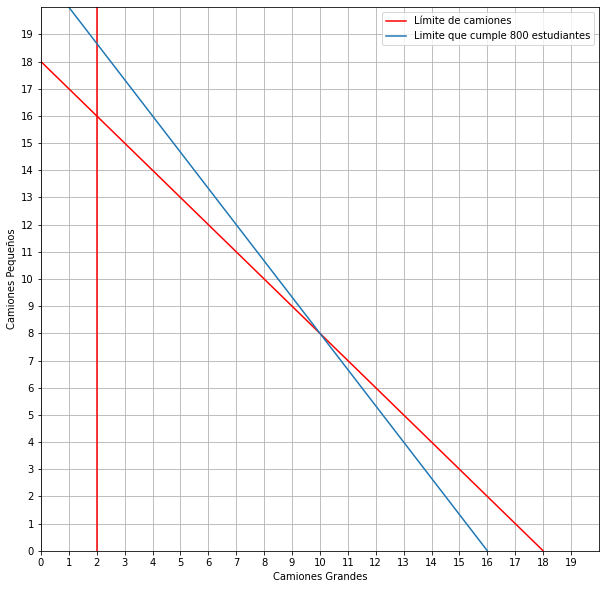

In [106]:
plt.figure(figsize=(10,10)) 
plt.axline((2,16),(18,0),color="red",label="Límite de camiones")
plt.axvline(2,color='r')
plt.axline(limite_camion_g,limite_camion_p,label="Limite que cumple 800 estudiantes")
plt.xlim((0,20))
plt.ylim((0,20))
plt.xticks(np.arange(0,20,1))
plt.yticks(np.arange(0,20,1))
plt.legend()
plt.xlabel("Camiones Grandes")
plt.ylabel("Camiones Pequeños")
plt.grid()
plt.show()


__Identificar los puntos de intersección__

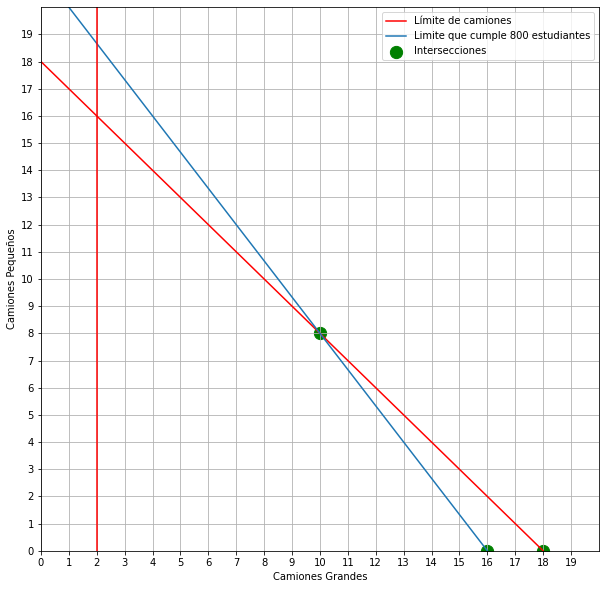

In [119]:

plt.figure(figsize=(10,10)) 
plt.axline((2,16),(18,0),color="red",label="Límite de camiones")
plt.axline(limite_camion_g,limite_camion_p,label="Limite que cumple 800 estudiantes")
plt.axvline(2,color='r')
plt.scatter([10,16,18],[8,0,0],color="g",label="Intersecciones",s=150)
plt.xticks(np.arange(0,20,1))
plt.yticks(np.arange(0,20,1))
plt.xlim((0,20))
plt.ylim((0,20))
plt.legend()
plt.xlabel("Camiones Grandes")
plt.ylabel("Camiones Pequeños")
plt.grid()
plt.show()


**Calculamos en estos puntos los Costos**

In [108]:
intersecciones = [(8,10),(16,0),(18,0)]
costos = []
for i in intersecciones:
    costo = (i[0]*CAMION_G_COSTO)+(i[1]*CAMION_P_COSTO)
    costos.append(costo)
cords_min = intersecciones[np.argmin(costos)]
cords_max = intersecciones[np.argmax(costos)]
print(f"Minimo: {min(costos)}, en punto {cords_min}, por lo tanto {cords_min[0]} camiones grandes y {cords_min[1]} pequenos")
print(f"Maximo: {max(costos)}, en punto: {cords_max}, por lo tanto {cords_max[0]} camiones grandes y {cords_max[1]} pequenos")



Minimo: 14200, en punto (8, 10), por lo tanto 8 camiones grandes y 10 pequenos
Maximo: 16200, en punto: (18, 0), por lo tanto 18 camiones grandes y 0 pequenos


#### **Comprobar solución con función Highs (evolución del método Simplex)**

__Definimos con ayuda de Numpy las desigualdades__

In [109]:
funcion_c = np.array([CAMION_G_COSTO,CAMION_P_COSTO])
desigualdad_a = np.array([[1,1],[-CAMION_G_CAP,-CAMION_P_CAP],[1,0],[0,1]])
desigualdad_b = np.array([18,-800,20,16])

__Función minimizada__

In [110]:
resultado_min = scipy.optimize.linprog(c=funcion_c,A_ub=desigualdad_a,b_ub=desigualdad_b,bounds=(0,None),method = 'highs',integrality=[1])

In [111]:
print(f"Resultado: {resultado_min.fun}, usando {resultado_min.x[0]} camiones grandes y {resultado_min.x[1]} camiones pequenos")

Resultado: 14200.0, usando 8.0 camiones grandes y 10.0 camiones pequenos


__Función Maximizada__

In [112]:
resultado_max = scipy.optimize.linprog(c=-funcion_c,A_ub=desigualdad_a,b_ub=desigualdad_b,bounds=(0,None),method = 'highs',integrality=[1])

In [113]:
print(f"Resultado: {resultado_max.fun*-1}, usando {resultado_max.x[0]} camiones grandes y {resultado_max.x[1]} camiones pequenos")

Resultado: 16200.0, usando 18.0 camiones grandes y 0.0 camiones pequenos


__Por lo tanto nuestros resultados son correctos__